## Impact of number of metrics
### dataset
### algo

In [1]:
import pickle
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import random
import json

from result_plots.QuerySketch.common.common import read_data, get_metric_mapping
from result_plots.QuerySketch.common.process_data_from_solver import get_mean_from_iterations, normalize_error_result, get_ensemble_error
from result_plots.QuerySketch.common.plot import get_result_from_pkl, get_x_position, get_xtick_position, \
                                                plot_raw, get_gain, gain_over_strawman, consolidate_gain_over_strawman

---

## Plotting functions

In [2]:
def call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name = "Test", \
                  mem_size = 131072, all_metrics = ['hh', 'change_det', 'entropy', 'card', 'fsd'], isSaveFig = False):
    
    plot_raw(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, all_metrics, isSaveFig)
    gain_result = gain_over_strawman(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, all_metrics, isSaveFig)
    merge_gain_result = consolidate_gain_over_strawman(gain_result, name, all_metrics, isSaveFig)
    
    global global_merge_gain_all_num_of_pcap
    for d in merge_gain_result:
        global_merge_gain_all_num_of_pcap.append(d)

    global global_name_all_num_of_pcap
    global_name_all_num_of_pcap.append(name)

## Common variables

In [3]:
seeds = [1, 2, 3, 4, 5]
count = 1

flowkeys = ["dstIP,dstPort",]
epochs = ['30']
# same dataset
# datasets = ['equinix-nyc.dirA.20180517-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20180517-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20180517-131100.UTC.anon.pcap/', 
#            'equinix-nyc.dirA.20180621-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20180621-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20180621-131100.UTC.anon.pcap/', 
#            'equinix-nyc.dirA.20180816-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20180816-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20180816-131100.UTC.anon.pcap/', ]

all_metrics = ['hh', 'change_det', 'entropy', 'card', 'fsd']

# diff dataset
# datasets = ['equinix-nyc.dirA.20181018-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20181018-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20181018-131100.UTC.anon.pcap/', 
#            'equinix-nyc.dirA.20181115-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20181115-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20181115-131100.UTC.anon.pcap/', 
#            'equinix-nyc.dirA.20181220-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20181220-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20181220-131100.UTC.anon.pcap/', ]

isSaveFig = False
mem_size = 131072

In [4]:
## Global variables
## !!, must reset every time
global_merge_gain_all_num_of_pcap = []
global_name_all_num_of_pcap = []

## record ensemble error per box
global_ensemble_error = []

---

## Plot the same dataset

----

### 1 pcaps (same dataset)

In [5]:
datasets = ['equinix-nyc.dirA.20180517-130900.UTC.anon.pcap/', ]

name = f'{len(datasets)} Datasets - {int(mem_size/1024)} KB'

ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [6]:

# ========== pcap_1_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 211.43246462497072, 'change_det': 23.006532029919505, 'entropy': 289.6611775583889, 'card': 18.155426809503965, 'fsd': 1.7645815409314607}


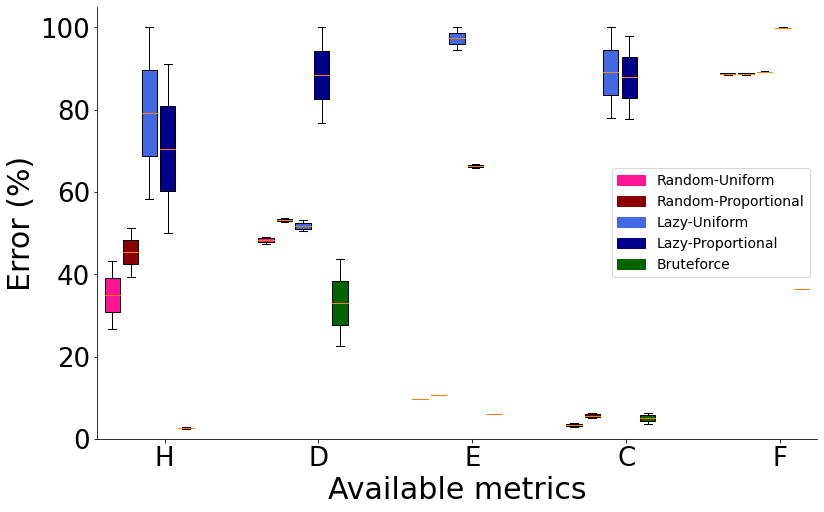

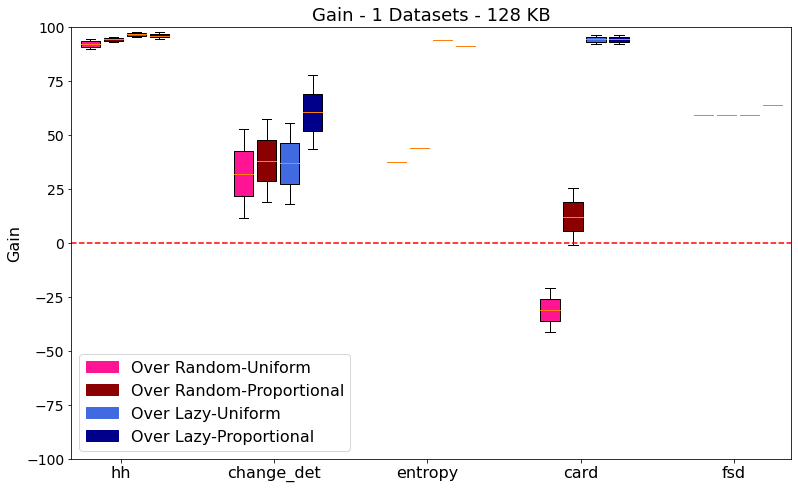

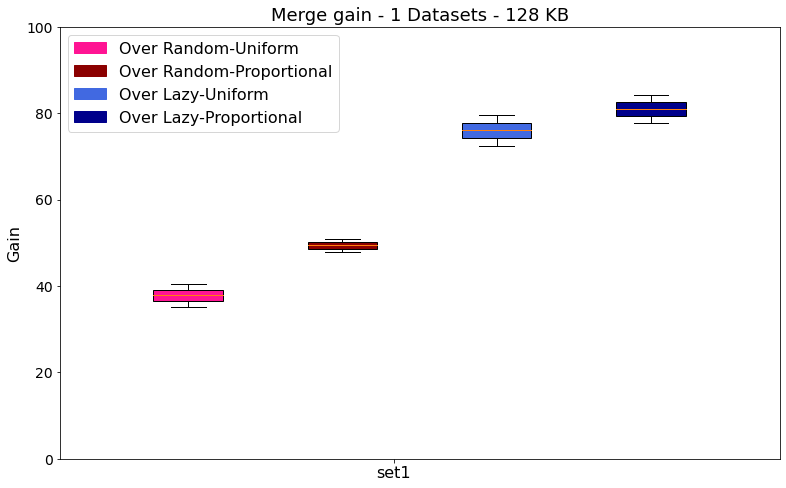

In [7]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 3 pcaps (same dataset)

In [8]:
datasets = ['equinix-nyc.dirA.20180517-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20180517-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20180517-131100.UTC.anon.pcap/', ]

name = f'{len(datasets)} Datasets - {int(mem_size/1024)} KB'

ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [9]:

# ========== pcap_3_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', 'change_det', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', 'change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 301.6471806979313, 'change_det': 23.45508797707988, 'entropy': 294.53362419548694, 'card': 18.081524033655562, 'fsd': 1.6639662142347933}


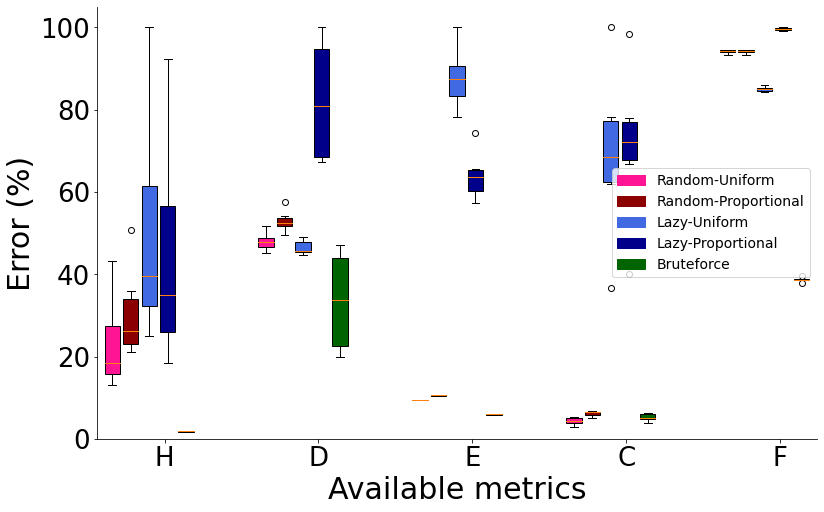

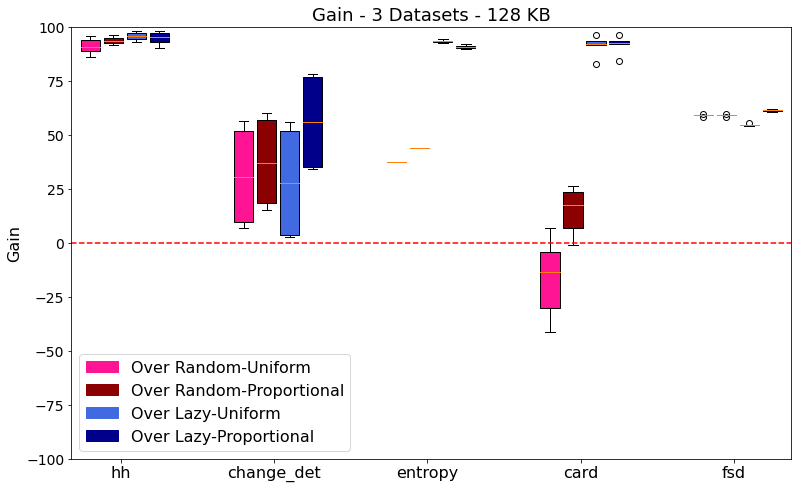

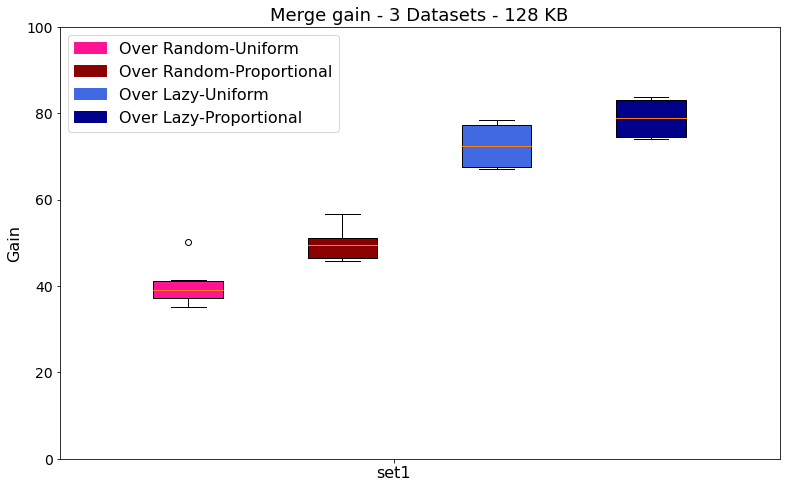

In [10]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 5 pcaps (same dataset)

In [11]:
datasets = ['equinix-nyc.dirA.20180517-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20180517-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20180517-131100.UTC.anon.pcap/', 
           'equinix-nyc.dirA.20180621-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20180621-131000.UTC.anon.pcap/', ]

name = f'{len(datasets)} Datasets - {int(mem_size/1024)} KB'

ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [12]:

# ========== pcap_5_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 307.50904274795573, 'change_det': 25.0592435282983, 'entropy': 313.4243760477267, 'card': 20.78604872939319, 'fsd': 1.7655981054612528}


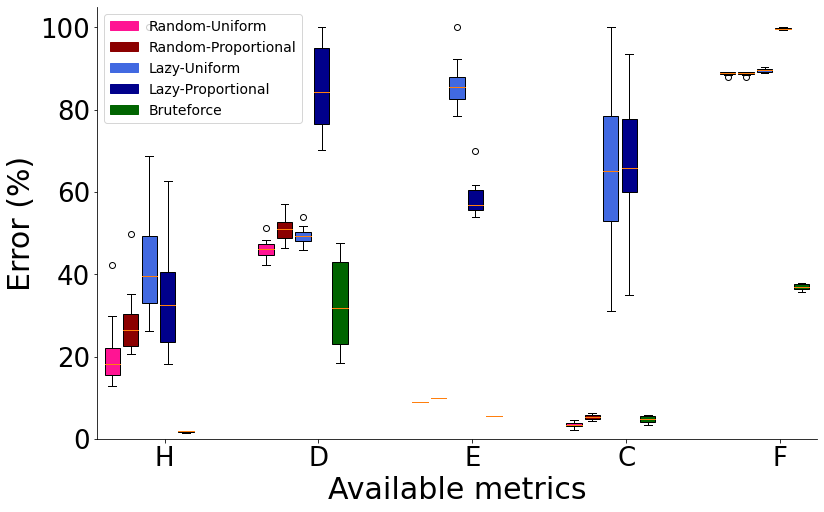

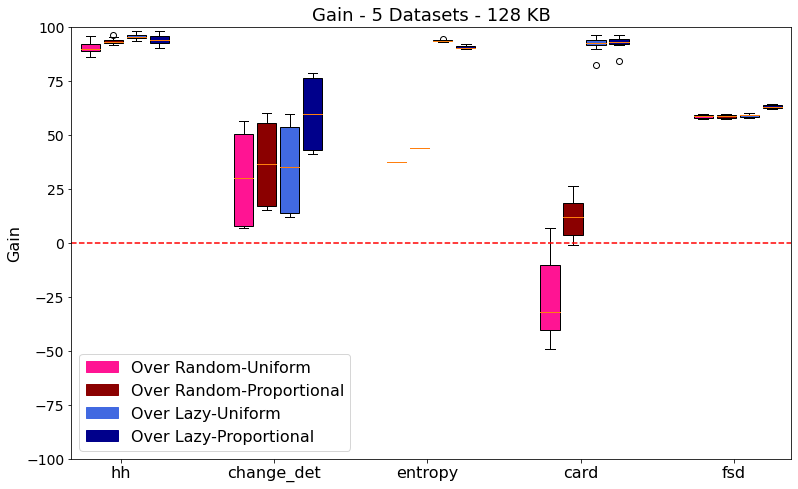

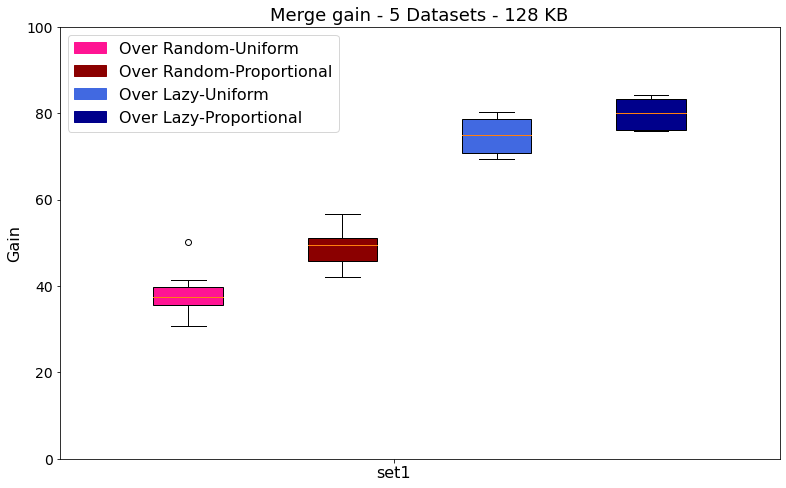

In [13]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 7 pcaps (same dataset)

In [14]:
datasets = ['equinix-nyc.dirA.20180517-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20180517-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20180517-131100.UTC.anon.pcap/', 
           'equinix-nyc.dirA.20180621-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20180621-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20180621-131100.UTC.anon.pcap/', 
           'equinix-nyc.dirA.20180816-130900.UTC.anon.pcap/', ]

name = f'{len(datasets)} Datasets - {int(mem_size/1024)} KB'

ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [15]:

# ========== pcap_7_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 301.6471806979313, 'change_det': 21.403978969729895, 'entropy': 300.2351504598513, 'card': 20.52014497398337, 'fsd': 1.7804552966257687}


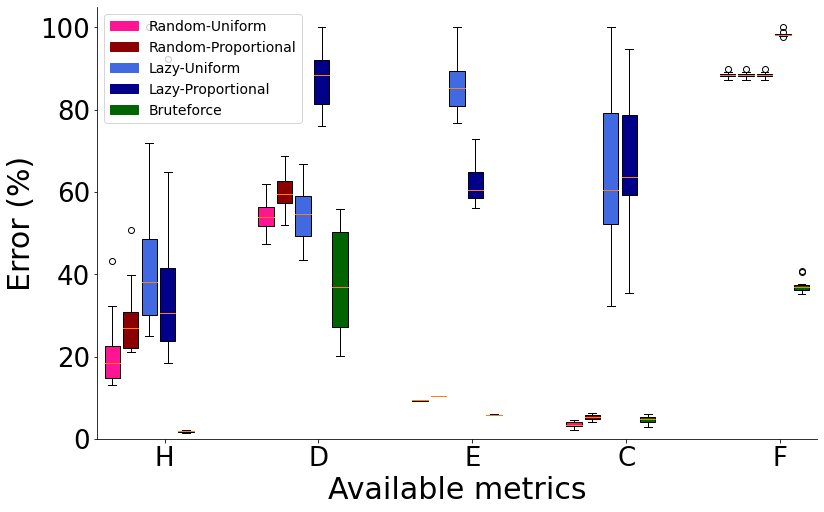

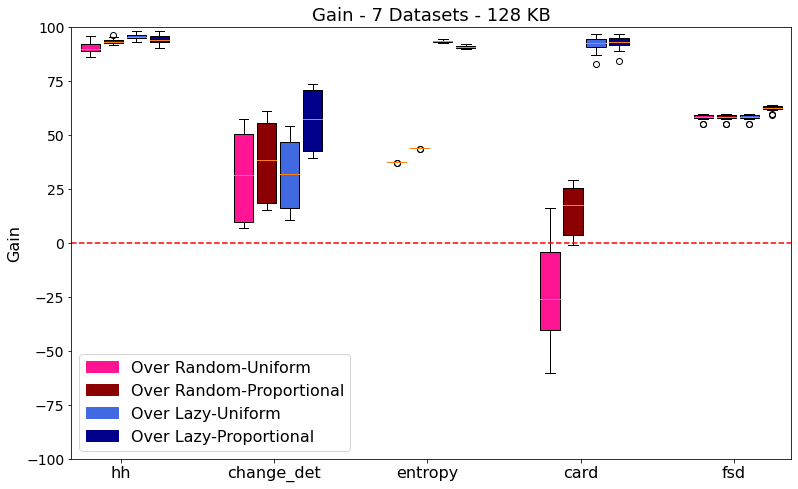

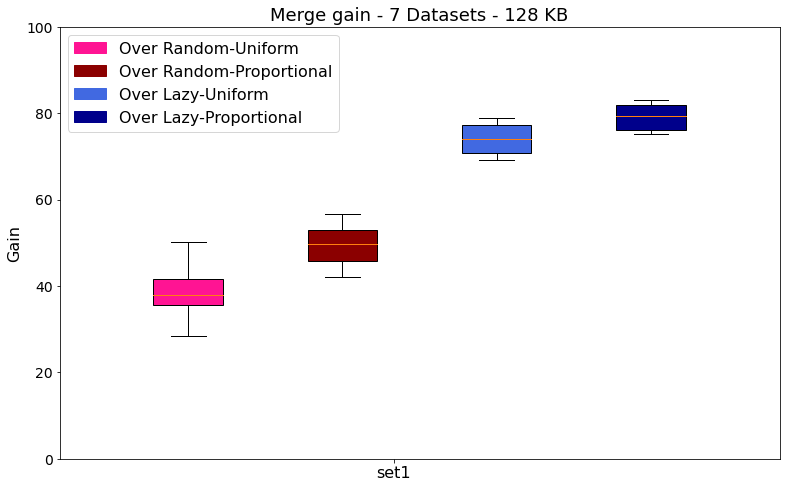

In [16]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 9 pcaps (same dataset)

In [17]:
datasets = ['equinix-nyc.dirA.20180517-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20180517-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20180517-131100.UTC.anon.pcap/', 
           'equinix-nyc.dirA.20180621-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20180621-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20180621-131100.UTC.anon.pcap/', 
           'equinix-nyc.dirA.20180816-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20180816-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20180816-131100.UTC.anon.pcap/', ]

name = f'{len(datasets)} Datasets - {int(mem_size/1024)} KB'

ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [18]:

# ========== pcap_9_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5
max_list: {'hh': 307.50904274795573, 'change_det': 30.278134101309757, 'entropy': 322.05353972745525, 'card': 20.78604872939319, 'fsd': 1.7707002035434294}


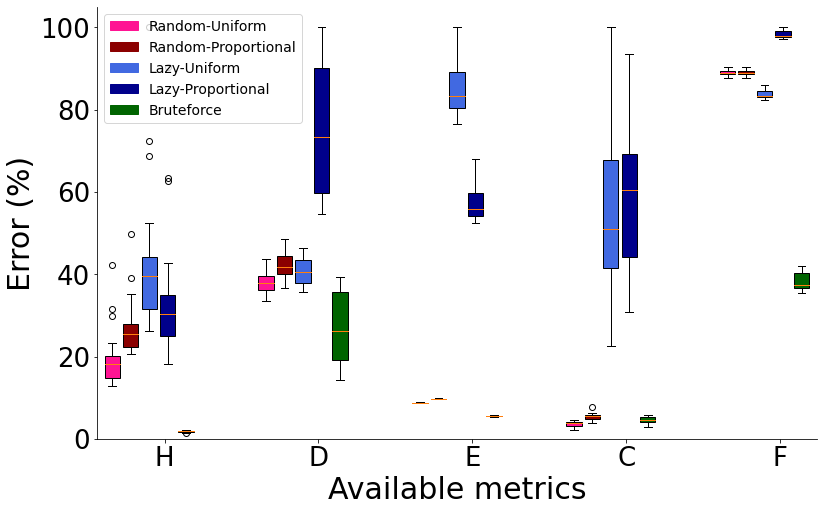

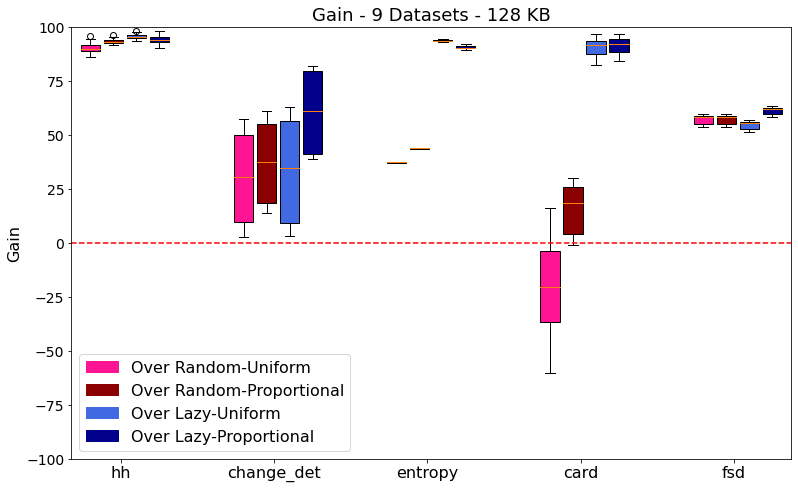

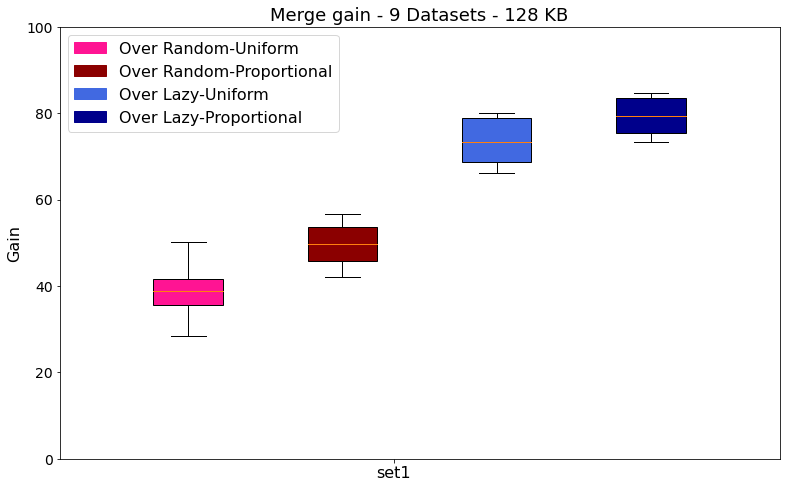

In [19]:
## pre-processing data
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = normalize_error_result(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics)
## Get & record ensemble error
global_ensemble_error = get_ensemble_error(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, all_metrics, global_ensemble_error)
## call plotting
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

## Impact of number of pcaps (same dataset)

In [30]:
## Plot raw result
def boxplot_impact_pcap(data, labels, name, isSaveFig = False):
    ## comparison version plot
    # box plot 
    # https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/
    # Box plots with custom fill colors
    # https://matplotlib.org/stable/gallery/statistics/boxplot_color.html

    import matplotlib.patches as mpatches

    xlabels = labels
    colors = ['deeppink', 'darkred', 'royalblue', 'darkblue']
    colors = colors * int(len(data) / 4) # 4 strawmen

    fig = plt.figure(figsize = (10, 6))
    # Creating axes instance
    ax = fig.add_axes([0, 0, 1, 1])
    
    ax.set_ylim([0, 100])

    # Creating plot
    bplot = ax.boxplot(x=data, 
                       positions = get_x_position(int(len(data) / 4), 4),
                       patch_artist=True) # , showfliers=False
    # ax.set_xlim(0, 1)

    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

    # plt.axhline(y = 0, color = 'r', linestyle = '--')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.grid()
    
    plt.ylabel("Error reduction (%)", fontsize=28)
    plt.xlabel("Number of traces", fontsize=28)
    plt.xticks(get_xtick_position(int(len(data) / 4), 4), xlabels, fontsize=26)
    plt.yticks(fontsize=26)

    # plt.title(f"Impact of number of traces used for profiling on SketchMercator’s performance", fontsize=18)

    # create legends
    legend_labels = ['over Random-Uniform', 'over Random-Proportional', 
                    'over Lazy-Uniform', 'over Lazy-Proportional']
    legend_patch = []
    legend_patch.append(mpatches.Patch(color=colors[0], label=legend_labels[0]))
    legend_patch.append(mpatches.Patch(color=colors[1], label=legend_labels[1]))
    legend_patch.append(mpatches.Patch(color=colors[2], label=legend_labels[2]))
    legend_patch.append(mpatches.Patch(color=colors[3], label=legend_labels[3]))
    plt.legend(handles=legend_patch, fontsize=22, frameon=False, ncol=2) # , loc="upper right"

    # import pickle
    # with open(f'pickles/{name}.pkl', 'wb') as fout:
    #     pickle.dump(fig, fout)
    # plt.savefig('figures/impact_of_profiling_cost.pdf', format='pdf', bbox_inches='tight')

    # show plot
    plt.show()

In [31]:
name_for_all_taskset = []
for d in global_name_all_num_of_pcap:
    name_for_all_taskset.append(d.split(" ")[0]) #.split('(')[0].split('m ')[1]
name_for_all_taskset

['1', '3', '5', '7', '9']

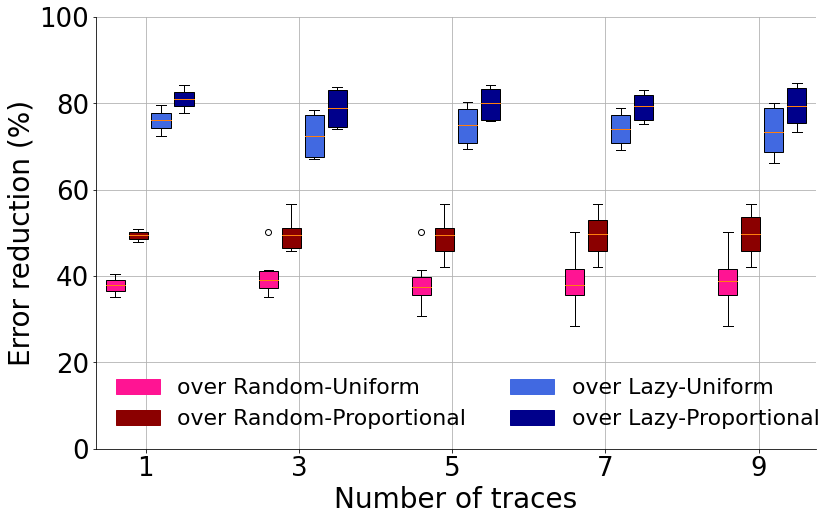

In [32]:
isSaveFig = False
boxplot_impact_pcap(global_merge_gain_all_num_of_pcap, name_for_all_taskset, "impact_of_profiling_cost", isSaveFig)

### Save plot data as json

In [23]:
# Save data as json
isDumpJson = False

if isDumpJson:
    # save gain result
    ll = []
    for arr in global_merge_gain_all_num_of_pcap:
        ll.append(arr.tolist())
    with open('results/figure_data/impact_of_profiling_cost.json', 'w') as out:
        json.dump(ll, out)
        
    # save ensemble error
    ll = []
    for arr in global_ensemble_error:
        ll.append(arr.tolist())
    with open('results/figure_data/impact_of_profiling_cost.json', 'w') as out:
        json.dump(ll, out)

---

## Plot different dataset

In [24]:
# diff dataset
datasets = ['equinix-nyc.dirA.20181018-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20181018-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20181018-131100.UTC.anon.pcap/', 
           'equinix-nyc.dirA.20181115-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20181115-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20181115-131100.UTC.anon.pcap/', 
           'equinix-nyc.dirA.20181220-130900.UTC.anon.pcap/', 'equinix-nyc.dirA.20181220-131000.UTC.anon.pcap/', 'equinix-nyc.dirA.20181220-131100.UTC.anon.pcap/', ]

# reset global variables
global_merge_gain_all_num_of_pcap = []
global_name_all_num_of_pcap = []

----

### 3 pcaps (diff dataset)

In [25]:

name = f'3 Datasets - {int(mem_size/1024)} KB'

ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [26]:

# ========== pcap_3_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', 'change_det', ]
algos = ['cm']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', 'change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5


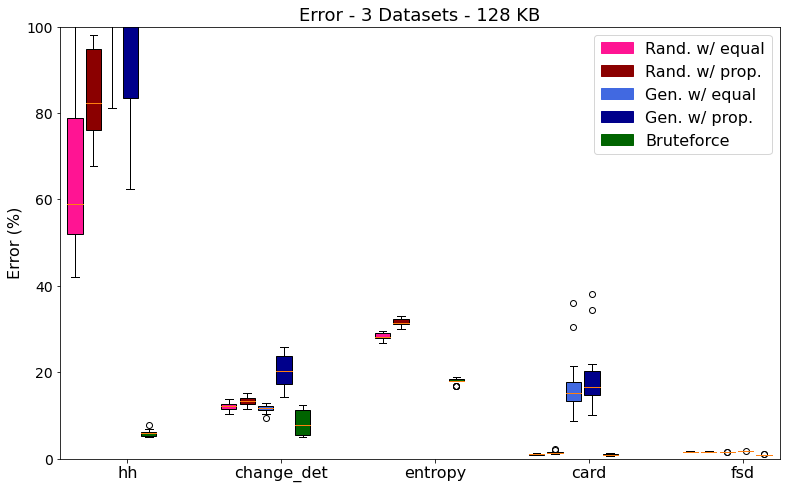

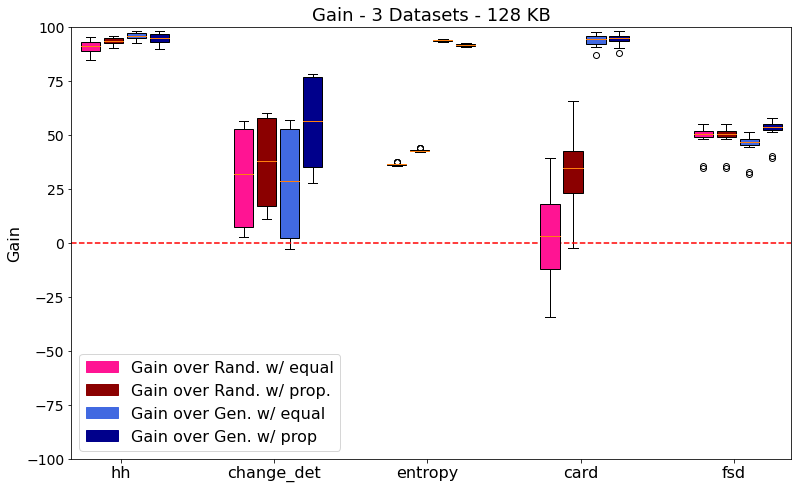

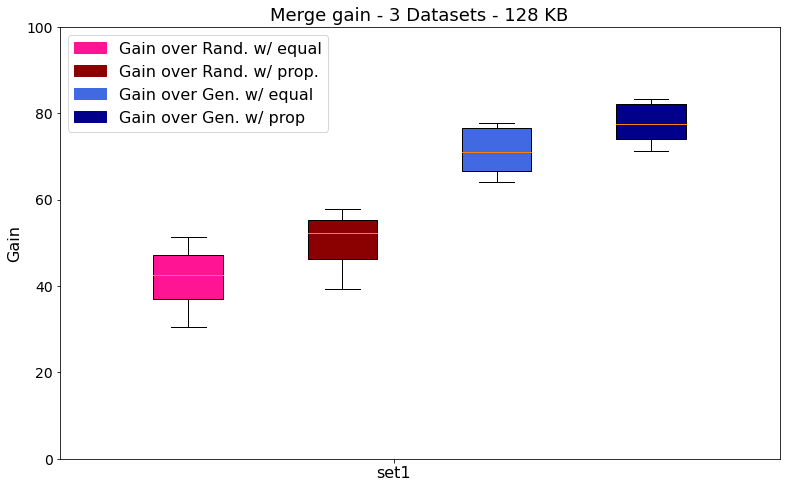

In [27]:
## call plotting
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 5 pcaps (diff dataset)

In [28]:

name = f'5 Datasets - {int(mem_size/1024)} KB'

ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [29]:

# ========== pcap_5_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5


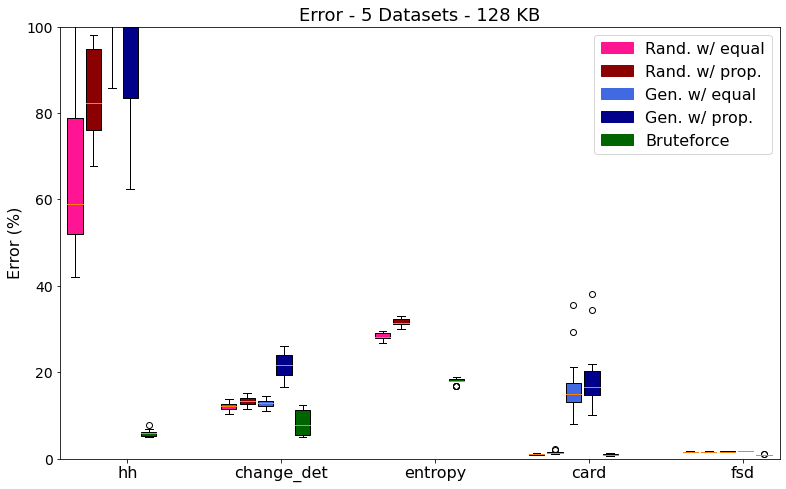

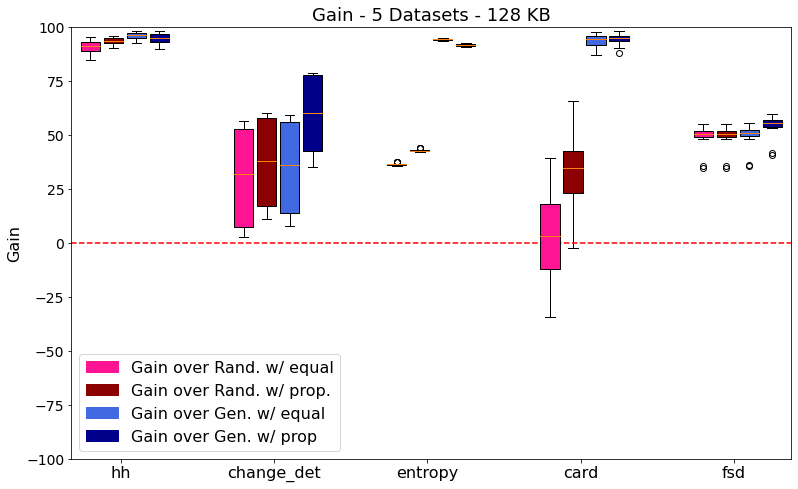

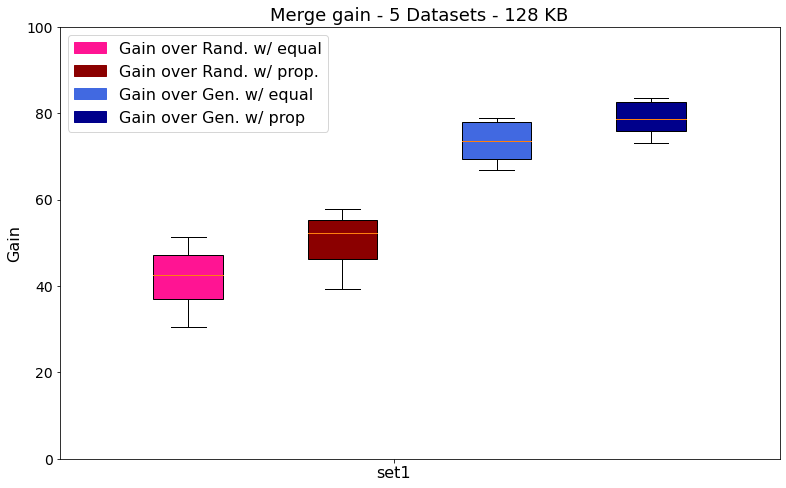

In [30]:
## call plotting
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 7 pcaps (diff dataset)

In [31]:

name = f'7 Datasets - {int(mem_size/1024)} KB'

ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [32]:

# ========== pcap_7_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5


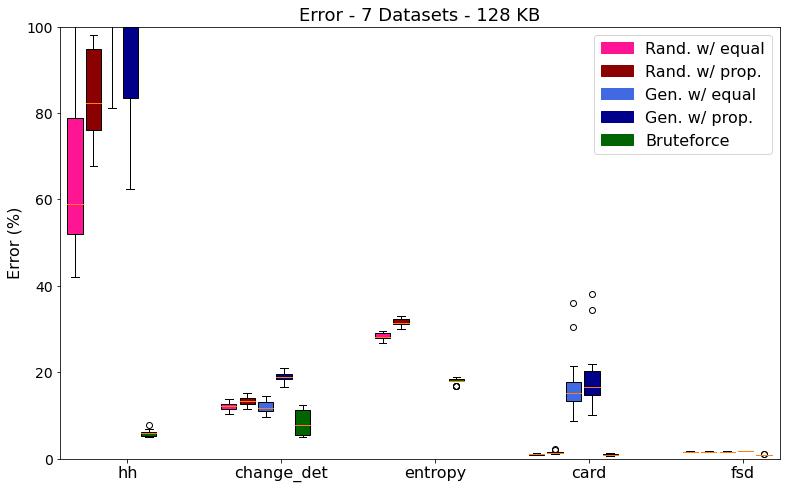

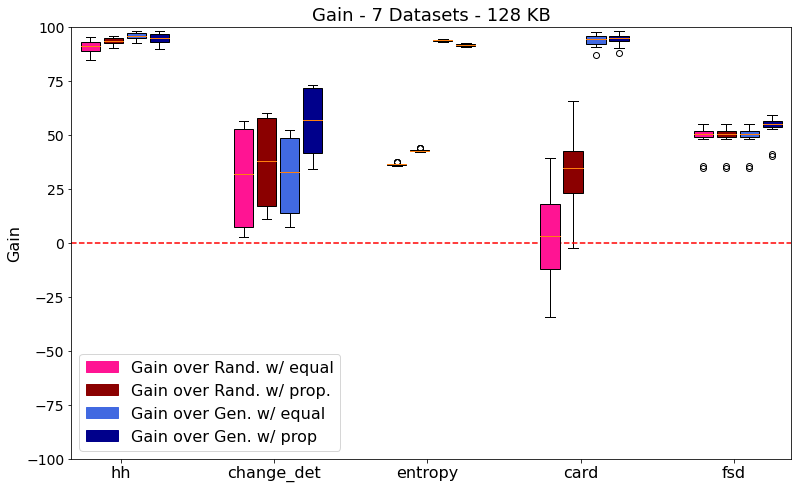

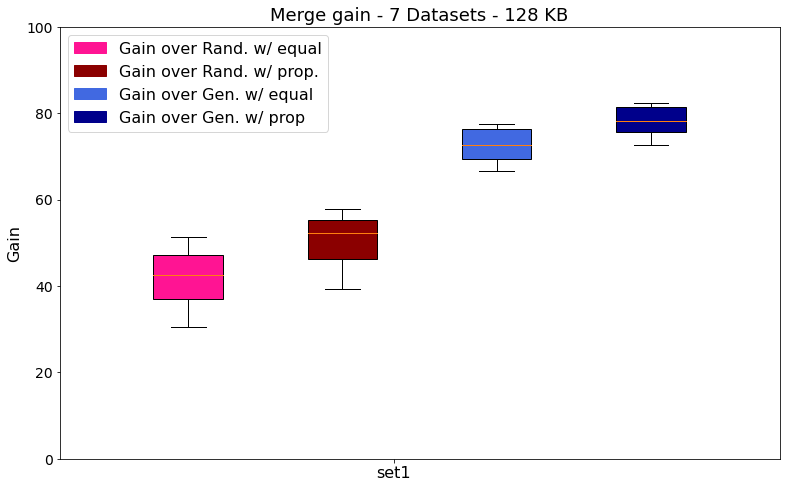

In [33]:
## call plotting
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

----

### 9 pcaps (diff dataset)

In [34]:

name = f'9 Datasets - {int(mem_size/1024)} KB'

ret_sol1_ll = []
ret_sol2_ll = []
ret_sol3_ll = []
ret_sol4_ll = []
ret_us_ll = []

In [35]:

# ========== pcap_9_run_5.json ==========

#############################
ret_us = {} 

measure_list = ['hh', 'change_det', ]
algos = ['cs']
widths = [4096]
rows = [3]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [2048]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_us = {**ret_us, **tmp}

ret_us_ll.append(ret_us)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [65536]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [32768]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [32768]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol1 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [262144]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol1 = {**ret_sol1, **tmp}

ret_sol1_ll.append(ret_sol1)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', 'change_det', 'entropy', 'fsd', ]
algos = ['cs']
widths = [8192]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', 'fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['hll']
widths = [16384]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['mrb']
widths = [16384]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol2 = {} 

measure_list = ['hh', ]
algos = ['univmon']
widths = [128]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['change_det', 'fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['entropy', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

measure_list = ['card', ]
algos = ['lc']
widths = [131072]
rows = [1]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol2 = {**ret_sol2, **tmp}

ret_sol2_ll.append(ret_sol2)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [1024]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol3 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [256]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [4096]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol3 = {**ret_sol3, **tmp}

ret_sol3_ll.append(ret_sol3)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['mrac']
widths = [512]
rows = [1]
level = 8
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)

#############################
ret_sol4 = {} 

measure_list = ['hh', 'entropy', 'card', ]
algos = ['univmon']
widths = [512]
rows = [2]
level = 16
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['fsd', ]
algos = ['cm']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

measure_list = ['change_det', ]
algos = ['cs']
widths = [2048]
rows = [2]
level = 1
ret = get_result_from_pkl(algos, rows, widths, level, seeds, count, measure_list, flowkeys, epochs, datasets)
for m in measure_list:
	tmp = {}
	tmp[m] = ret[m][rows[0]][widths[0]]
	ret_sol4 = {**ret_sol4, **tmp}

ret_sol4_ll.append(ret_sol4)


Num of run: 5


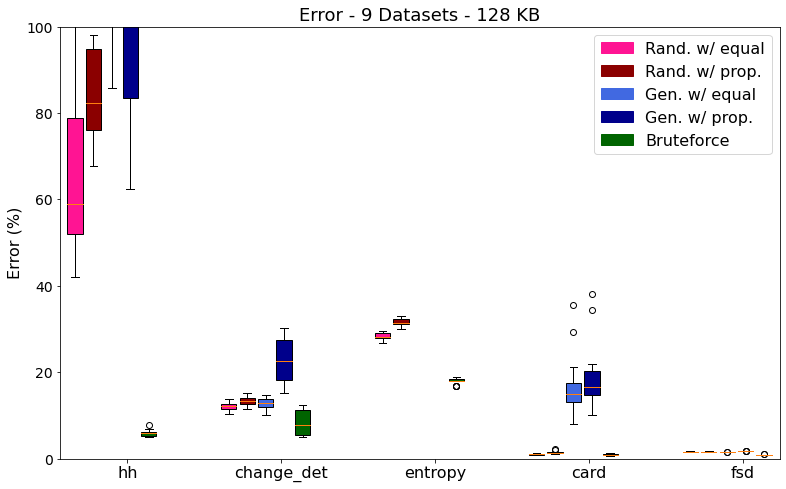

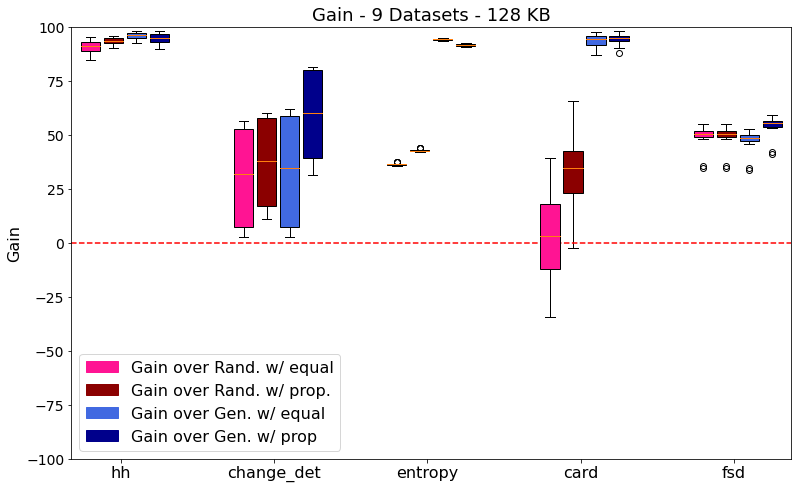

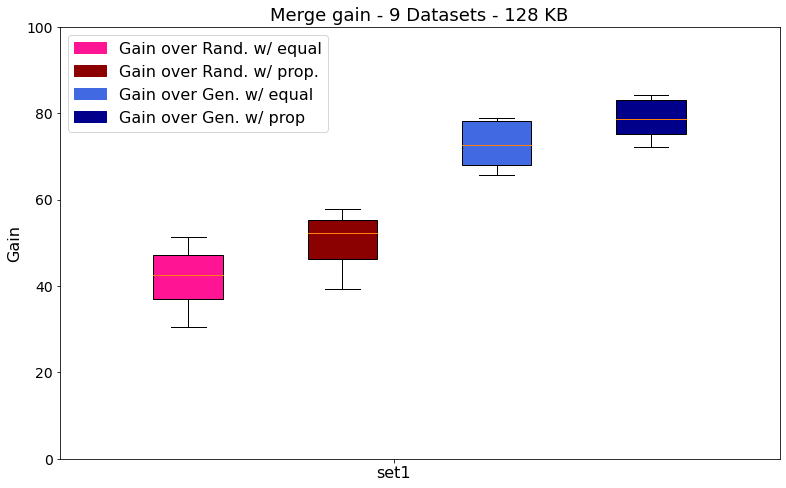

In [36]:
## call plotting
ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us = get_mean_from_iterations(ret_sol1_ll, ret_sol2_ll, ret_sol3_ll, ret_sol4_ll, ret_us_ll, all_metrics)
call_plotting(ret_sol1, ret_sol2, ret_sol3, ret_sol4, ret_us, name, mem_size, all_metrics, isSaveFig)

## Impact of number of pcaps (different dataset)

In [37]:
# name_for_all_taskset = []
# for d in global_name_all_num_of_pcap:
#     name_for_all_taskset.append(d.split(" ")[0]) #.split('(')[0].split('m ')[1]
# name_for_all_taskset

In [38]:
# isSaveFig = False
# boxplot_impact_pcap(global_merge_gain_all_num_of_pcap, name_for_all_taskset, "Different dateset - " + str(int(mem_size/1024))+" KB", isSaveFig)